In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("data/raw/train(1).xlsx")

df["price_log"] = np.log1p(df["price"])

features = ["bedrooms","bathrooms","sqft_living","sqft_lot","sqft_living15","sqft_lot15","condition","grade","view","waterfront"]

X = df[features]
y = df["price_log"]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns = features)\
    .to_csv("data/processed/train_tabular.csv",index=False)

<Figure size 1000x800 with 0 Axes>

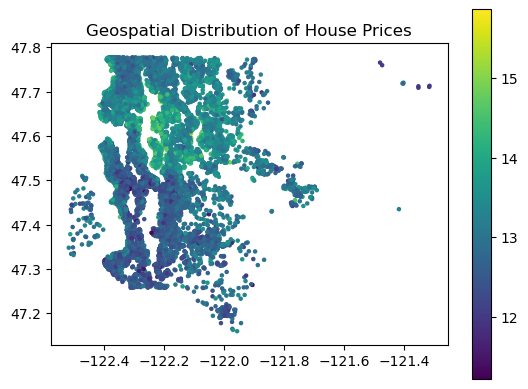

In [5]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

geometry = [Point(xy) for xy in zip(df["long"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry = geometry)
gdf.set_crs(epsg = 4326, inplace = True)

plt.figure(figsize=(10,8))
gdf.plot(column="price_log", cmap="viridis", legend=True, markersize=5)
plt.title("Geospatial Distribution of House Prices")
plt.show()

In [6]:
df_out = df[features + ["price_log"]]
df_out.to_csv("data/processed/train_full.csv", index=False)

In [7]:
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']